# Application use our Poisson System



In [5]:
from src.util import *
from src.get_mask import Painter
from src.poisson_system import Poisson_system
from src.poisson_solver import sor_solver_jit
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import cv2
# hidecode()

## Object Insertion
### 1. Seamless insert people into their idol’s picture

In [6]:
def seamless_blending(paths, gname, fname, method='dg', maskname=None,omega=1.8, show_plot=True, draw=True, adjust_ilu=False):
    maskname = gname.split('.')[0]+'_'+fname.split('.')[0]+'.png' if maskname is None else maskname
    if draw:
        # draw mask
        pp = Painter(g_impath=paths+gname, f_impath=paths+fname)
        pp.get_mask(maskname)
        source = cv2.cvtColor(pp.g, cv2.COLOR_BGR2RGB)
        destination = cv2.cvtColor(pp.f, cv2.COLOR_BGR2RGB)
        mask = pp.mask
    else:
        source = plt.imread(paths+'new_'+gname)
        destination = plt.imread(paths+fname)
        mask = plt.imread(paths+maskname)
        
    # get poisson equation
    PS = Poisson_system(source=source, destination=destination, mask=mask,adjust_ilu=adjust_ilu)
    A, b = PS.get_Ab(method=method)
    A = A.tolil()
    data = [np.array(it) for it in A.data]
    rows = [np.array(it) for it in A.rows]
    diag = A.diagonal()

    # solve poisson equation
    #x0 = PS.g[PS.mask==1]
    #x1 = sor_solver_jit(data, rows, diag, b, omega, x0=x0,eps=5e-3)
    x1 = spsolve(A=A, b=b)
    combinel_img = PS.combine(x1)
    
    # show plot
    if show_plot:
        sourcetmp = blend(source, mask, x=np.ones_like(source) * 255, alpha=0.7)
        plt.figure(figsize=(10, 8))
        plt.subplot(2, 2, 1)
        plt.imshow(sourcetmp)
        plt.title('source')
        plt.subplot(2, 2, 2)
        plt.imshow(destination)
        plt.title('destination')
        plt.subplot(2,2,3)
        plt.imshow(blend(image=destination,mask=mask,x=source,alpha=0))
        plt.title('normal blending')
        plt.subplot(2,2,4)
        plt.imshow(combinel_img)
        plt.title('Seamless blending: '+PS.cur_method[1])
        plt.tight_layout()
        plt.savefig(paths+maskname.split('.')[0]+'.jpg')
        plt.show()
    return combinel_img,PS

In [7]:
paths = './data/'

Import gradient ['dg', 'import gradients', 'basic seamless cloning']


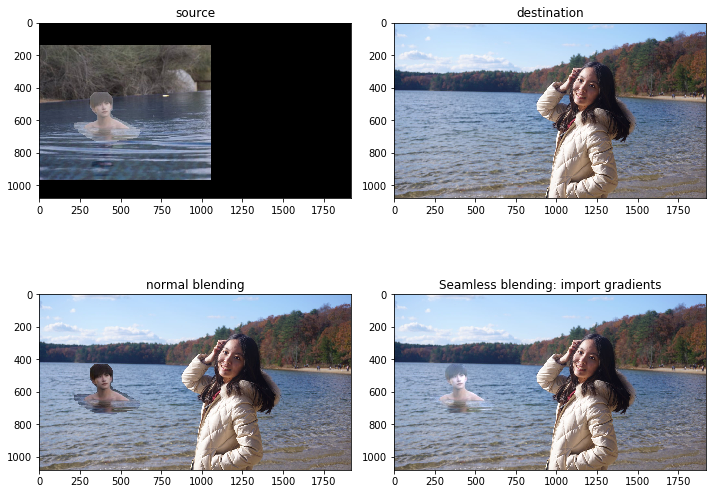

In [8]:
final_img,PS = seamless_blending(paths,gname='yyyy1.jpg', fname='kytlake.jpg',method='dg',draw=False, adjust_ilu=True)

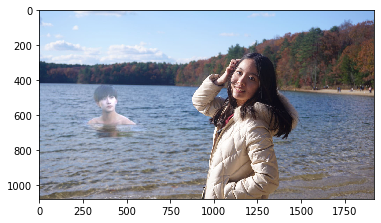

In [10]:
plt.imshow(final_img)
plt.imsave(paths+'/result/yy1_kyt.jpg',final_img)

In [44]:
PS.map.bnd.shape

(1080, 1919)

In [47]:
PS.f[PS.map.bnd==1].mean()

160.9418377321603

In [48]:
PS.g[PS.mask==1].mean()

101.8853433862267

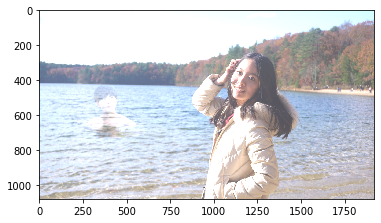

In [53]:
# fill_color = blend(final_img, cv2.erode(PS.mask, PS.kernel,iterations=5), PS.g, alpha=0.5)
fill_color = final_img.copy()
fill_color=np.clip(fill_color+0.3,0,1)
plt.imshow(fill_color)
# plt.imsave(paths+'/result/kyt_bjt_fill.jpg',fill_color)

In [63]:
fill_color.mean(0).shape

(1919, 3)

In [8]:
PS.g.max()

255.0

In [21]:
PS.mask.shape

(900, 1440)